In [ ]:
Retail Store Trend Analysis 

In [ ]:
1. Understand the Data

In [4]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
os.getcwd()

'C:\\Users\\User1\\Downloads'

In [15]:
sales_df = pd.read_csv('\\Users\\User1\\Downloads\\archive\\retail_store_sales.csv')

In [16]:
sales_df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [17]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [ ]:
2 Handling Missing Values

In [20]:
#Filling the null Values of Price Per Unit with (Total Spent) Quantity  
sales_df['Price Per Unit'] = sales_df['Price Per Unit'].fillna(sales_df['Total Spent']/sales_df['Quantity'])

In [22]:
#Fill the null values of Item based upon the Category and Price per unit  
sales_df['Item'] = sales_df.groupby(['Category', 'Price Per Unit'])['Item'].transform(lambda x: x.ffill().bfill())

In [24]:
# Fill the null values of Quantity column with the avg quantity bought as per the Customer ID, Category  
# Find the average quantity value of each customer depended upon the Customer ID and Category  
avg_quantity = sales_df.groupby(['Customer ID', 'Category'])['Quantity'].mean().reset_index()

In [25]:
avg_quantity.head()

,Customer ID,Category,Quantity
0,CUST_01,Beverages,5.203125
1,CUST_01,Butchers,5.412698
2,CUST_01,Computers and electric accessories,5.055556
3,CUST_01,Electric household essentials,6.519231
4,CUST_01,Food,5.714286


In [26]:
sales_df = pd.merge(sales_df, avg_quantity, on = ['Customer ID', 'Category'], how = 'left')

In [28]:
sales_df = sales_df.rename(columns = {'Quantity_x': 'Quantity', 'Quantity_y' : 'Avg Quantity'})

In [29]:
sales_df['Avg Quantity'] = sales_df['Avg Quantity'].round(0)

In [30]:
sales_df['Quantity'] = sales_df['Quantity'].fillna(sales_df['Avg Quantity'])

In [31]:
# Replace the null values of Total Spent with (Price Per UNIT) * (Quantity) 
sales_df['Total Spent'] = sales_df['Total Spent'].fillna(sales_df['Price Per Unit']*sales_df['Quantity'])

In [32]:
# Replace the values of Discound Applied column with 1 if True else 0  
sales_df['Discount Applied'] = sales_df['Discount Applied'].apply(lambda x: 1 if x == True else 0)

In [33]:
# Drop the Avg Quantity Column  
sales_df = sales_df.drop('Avg Quantity', axis = 1)

SUmmary Statistics

In [34]:
# Numerical Summary 
sales_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price Per Unit,12575.0,23.369304,10.748728,5.0,14.0,23.0,33.5,41.0
Quantity,12575.0,5.538688,2.790622,1.0,3.0,6.0,8.0,10.0
Total Spent,12575.0,129.738887,93.454470,5.0,52.0,109.5,192.0,410.0
Discount Applied,12575.0,0.335507,0.472186,0.0,0.0,0.0,1.0,1.0


In [35]:
# Categorical Summary   
sales_df.describe(include = 'object').transpose()

,count,unique,top,freq
Transaction ID,12575,12575,TXN_6867343,1
Customer ID,12575,25,CUST_05,544
Category,12575,8,Furniture,1591
Item,12575,200,Item_2_BEV,132
Payment Method,12575,3,Cash,4310
Location,12575,2,Online,6354
Transaction Date,12575,1114,2022-05-30,26


Key insights 
Each Transaction ID is unique 
There are 25 Customer ID but CUST_05 made 544 transactions  
1591 transaction were made in Furniture Category (Most Sold)
200 unique items, and item_2_BEV made 132 transactions  
More than 25% transactions  were through Cash Process  
Peak sales on May 30, 2022 

In [ ]:
4. Univriate Analysis  
Distribution of Numeric Features

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

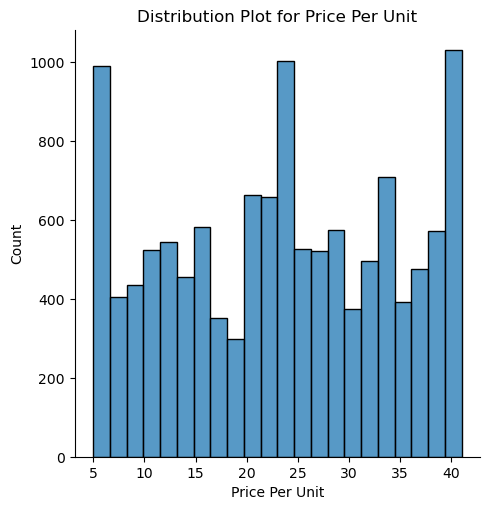

In [37]:
# Distribution of Price Per Unit 
plt.figure(figsize = (6,4))
sns.displot(sales_df['Price Per Unit'])
plt.title('Distribution Plot for Price Per Unit')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

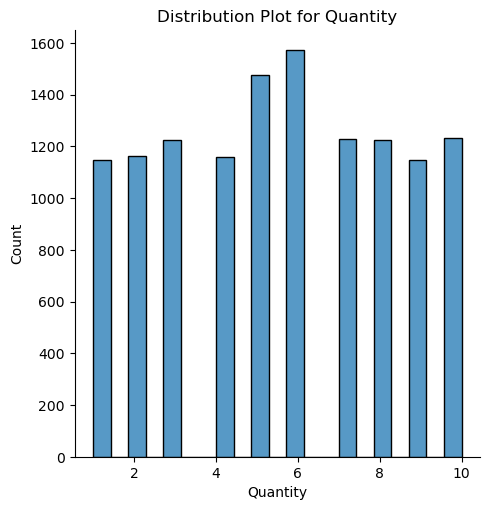

In [38]:
# Distribution Plot for Quantity  
plt.figure(figsize =(6,4))
sns.displot(sales_df['Quantity'])
plt.title('Distribution Plot for Quantity')
plt.show()

Almost evenly distributed across values  
Could indicate that customers buy in standard quantities

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

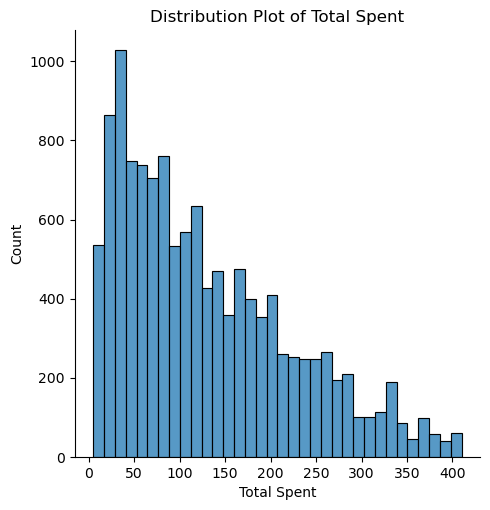

In [39]:
# Distribution of Total Spent  
plt.figure(figsize = (6,4))
sns.displot(sales_df['Total Spent'])
plt.title('Distribution Plot of Total Spent')
plt.show()

In [ ]:
Skewed towards lower values  
Suggests most purchases are of lower amounts  

5. Categorical Analysis

In [ ]:
Most common items, Categories and Payment Methods   
Top 10 Sold Items

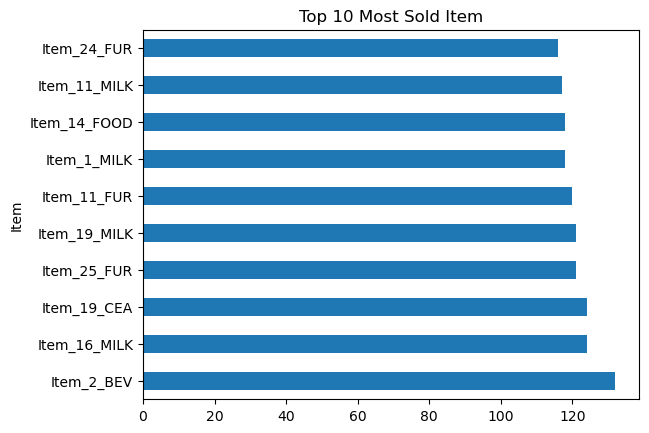

In [40]:
sales_df['Item'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Most Sold Item')
plt.show()

In [45]:
top_items = sales_df[sales_df['Item'].isin(['Item_24_FUR','Item_11_MILK','Item_14_FOOD','Item_1_MILK','Item_11_FUR'  
                                                                            ,'Item_19_MILK','Item_25_FUR',  
                        'Item_19_CEA','Item_16-MILK','Item_2_BEV'])]

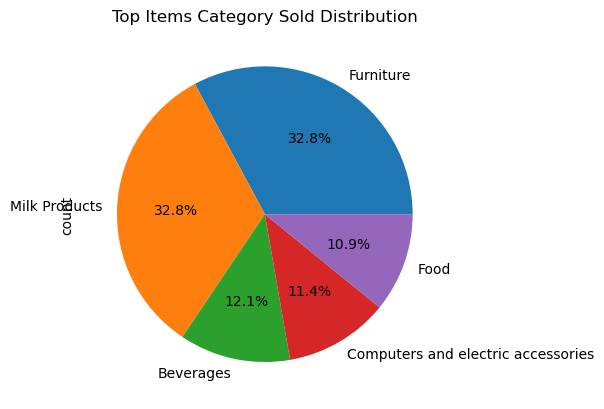

In [46]:
top_items['Category'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('Top Items Category Sold Distribution')
plt.show()

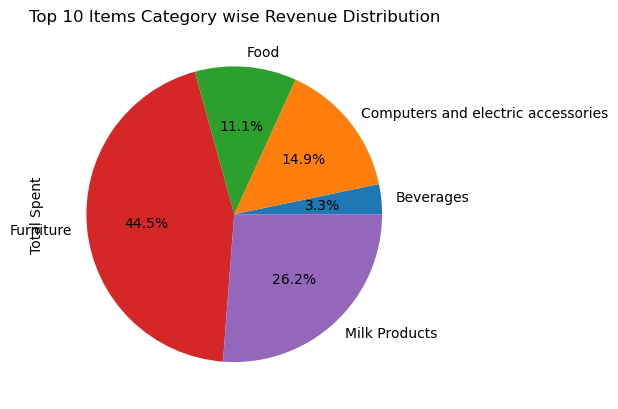

In [48]:
# Top 10 Items Category wise Revenue  
top_items.groupby('Category')['Total Spent'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Items Category wise Revenue Distribution')
plt.show()

Text(0.5, 1.0, 'Payment Method Distribution')

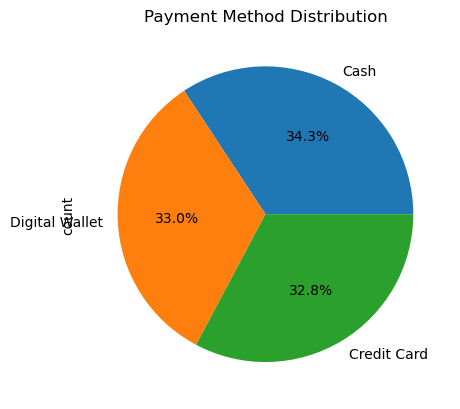

In [49]:
# Payment Method Distribution  
sales_df['Payment Method'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
plt.title('Payment Method Distribution')

In [ ]:
6. Bivariate Analysis 
Correlation between Numeric Variables  

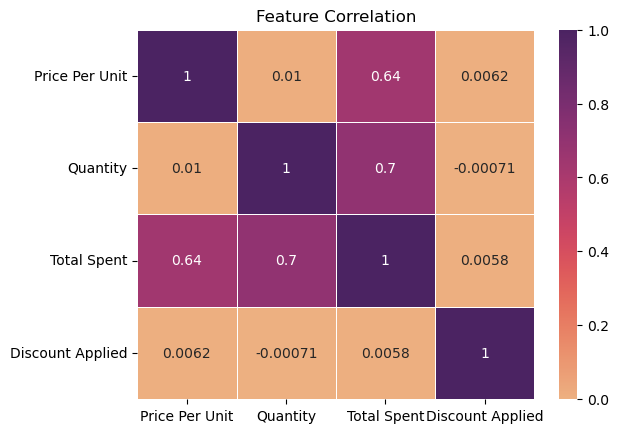

In [51]:
features = sales_df[['Price Per Unit', 'Quantity', 'Total Spent','Discount Applied']]
sns.heatmap(features.corr(), annot=True, cmap='flare', linewidths=0.5)
plt.title('Feature Correlation')
plt.show()

In [ ]:
Key insights  
Discount Applied- Quantity(-0.00071), Total Spent(0.0058)
    Almost no correlation with Quantity and Total Spent
    Price Per unit- Total Spent(0.64, Quantity(0.01)) 
    There is a moderate positive correlation suggestion that as the Price Per Unit increases the Total Spent also tends to increase
    Indicates that changes in Price per Unit have almost no linear relationship with quantity purchased.

In [ ]:
7. Time Based Analysis  
Trends over TIme 

In [52]:
# Convert transaction Date to datetime format  
sales_df['Transaction Date'] = pd.to_datetime(sales_df['Transaction Date'])

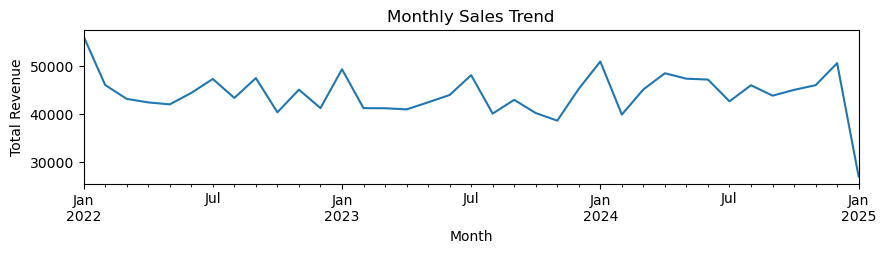

In [53]:
# Sales trend over time  
plt.figure(figsize = (10,2))
sales_df.groupby(sales_df['Transaction Date'].dt.to_period('M'))['Total Spent'].sum().plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [ ]:
8. Customer Behavior Analysis  
Identify High Value Customers

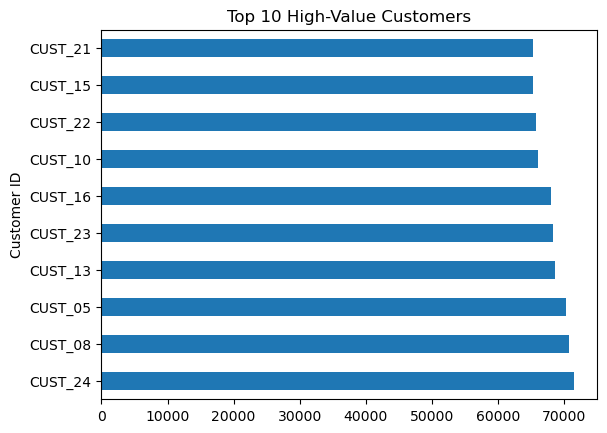

In [56]:
top_customers = sales_df.groupby('Customer ID')['Total Spent'].sum().sort_values(ascending = False).head(10)
top_customers.plot(kind='barh')
plt.title('Top 10 High-Value Customers')
plt.show()

In [57]:
# Checking the category distribution of total spent by customers of high value
high_value_cust = sales_df[sales_df['Customer ID'].isin(['CUST_21','CUST_15','CUST_22','CUST_10','CUST_16','CUST_23',
                                                        'CUST_13','CUST_05','CUST_08','CUST_24'])]

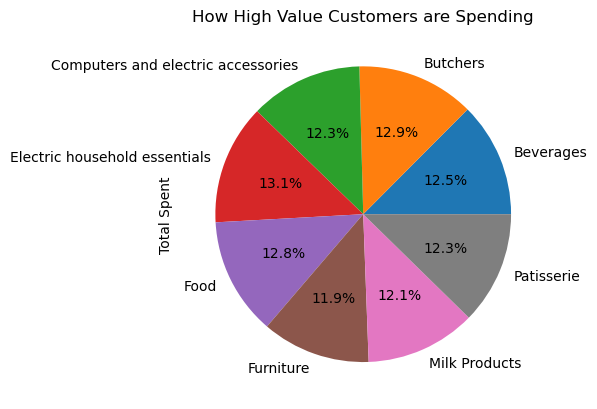

In [63]:
high_value_cust.groupby('Category')['Total Spent'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('How High Value Customers are Spending')
plt.show()

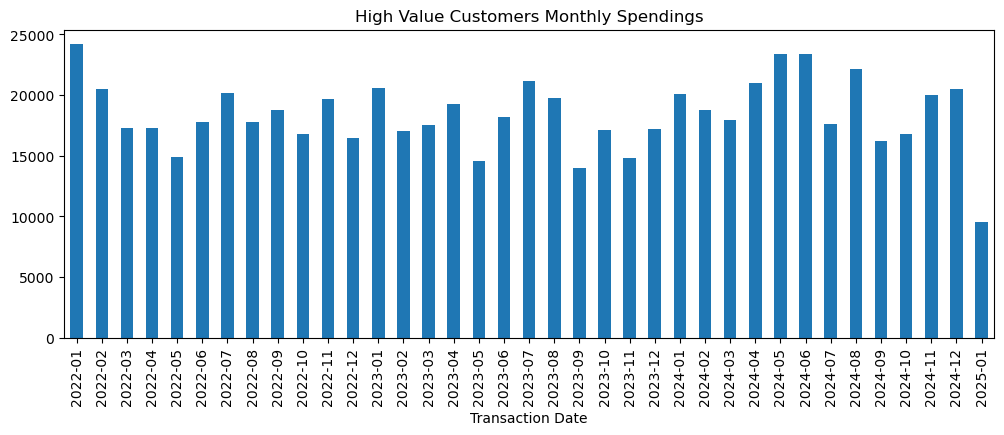

In [66]:
plt.figure(figsize= (12,4))
high_value_cust.groupby(sales_df['Transaction Date'].dt.to_period('M'))['Total Spent'].sum().plot(kind='bar')
plt.title('High Value Customers Monthly Spendings')
plt.show()